In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset
data=pd.read_csv('/content/drive/MyDrive/wine quality/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#normalization using standar scaler

from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
  -0.78782264]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
  -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
  -0.78782264]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   0.45084835]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
  -0.78782264]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   0.45084835]]


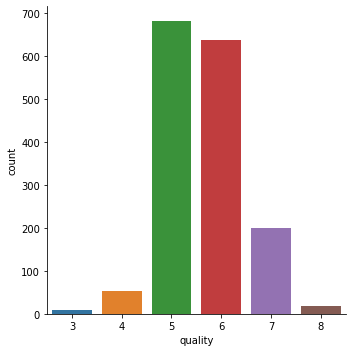

In [ ]:
# barplot for number of values for each quality
sns.catplot(x='quality', data = data, kind = 'count')

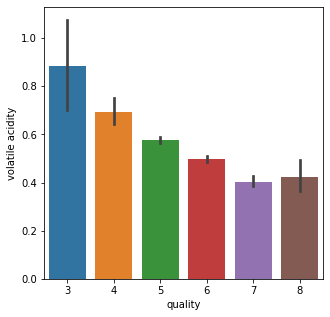

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = data)

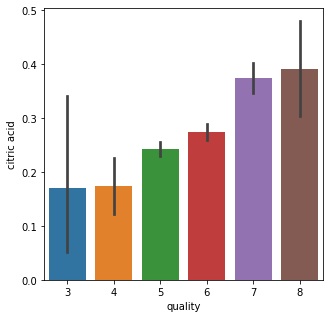

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = data)

In [ ]:
#to find correlation
correlation = data.corr()

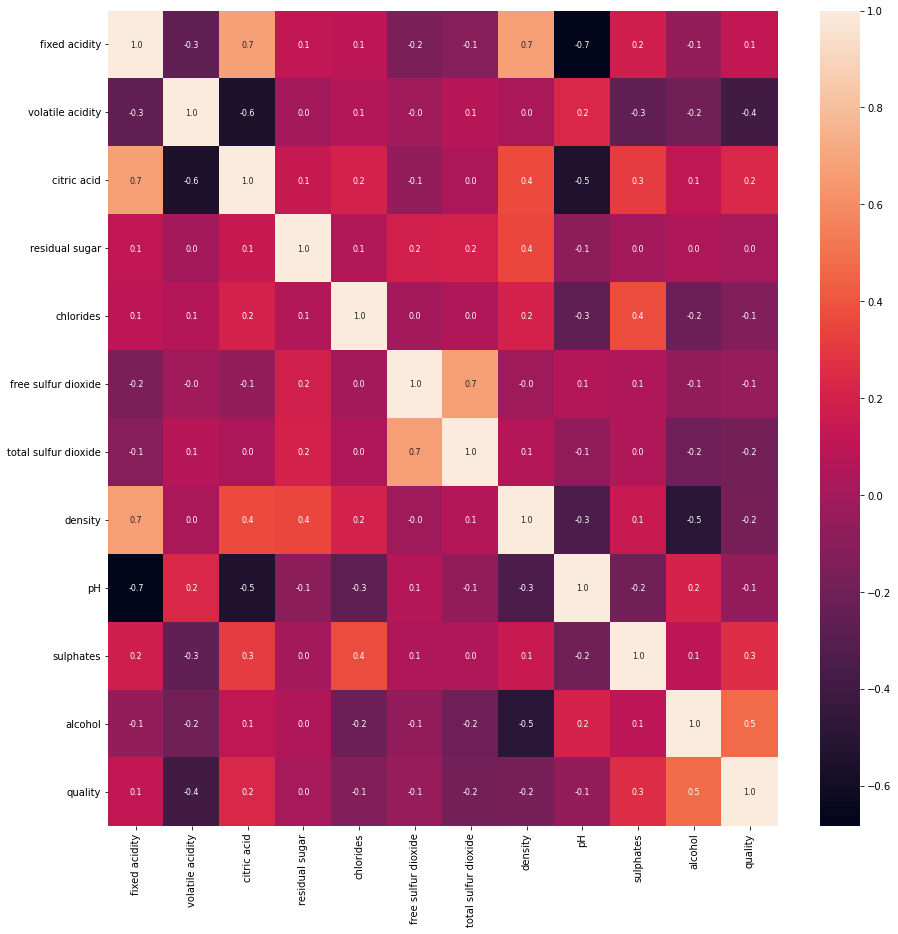

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True,  fmt = '.1f', annot = True, annot_kws={'size':8})

In [ ]:
# separate the data and Label
X = data.drop('quality',axis=1)

In [ ]:
#label binarization
Y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=15)

In [ ]:
print("x_train shape",xtrain.shape)
print("x_test shape", xtest.shape)
print("y_train shape",ytrain.shape)
print("y_test shape", ytest.shape)

x_train shape (1279, 11)
x_test shape (320, 11)
y_train shape (1279,)
y_test shape (320,)


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
# accuracy on test data
xtest_predict = model.predict(xtest)
test_accuracy = accuracy_score(xtest_predict, ytest)

In [ ]:
print('Accuracy : ', test_accuracy)

Accuracy :  0.928125


In [ ]:
#predict for new values

inp=[0.85,0.03,0.5,0.176,0.679,0.0075,0.78,0.529,0.90,0.910,0.0178]

In [ ]:
# changing the input data to a numpy array
numpy_array = np.asarray(inp)

In [ ]:
# reshape the data as we are predicting the label for only one instance
reshaped = numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#deployment
import pickle
name="quality_model.sav"
pickle.dump(model,open(name,'wb'))

In [ ]:
loaded_model=pickle.load(open('quality_model.sav','rb'))

In [ ]:
inp=([[8.5,90.56,0.5,176.5,67.9,3.9,0.78,52.9,9.05,10,0.0178]])
numpy_array = np.asarray(inp)
reshaped = numpy_array.reshape(1,-1)
predict=loaded_model.predict(reshaped)
print(predict)

[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predict

array([0])